<a href="https://colab.research.google.com/github/fcernafukuzaki/GoogleColab/blob/master/Clase_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch
# Trabajar con arreglos.
import numpy as np
# Redes neuronales
import torch.nn as nn
# Optimizaciones
import torch.optim as optim

#Graficar
import matplotlib.pyplot as plt

# Regresión Lineal

---



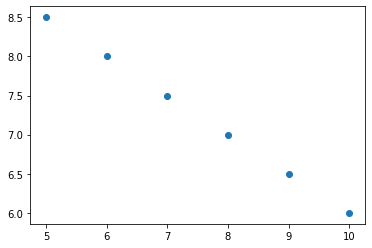

In [2]:
car_prices = [5, 6, 7, 8, 9, 10]
units_sold = [8.5, 8, 7.5, 7.0, 6.5, 6.0]

plt.scatter(car_prices, units_sold)

In [5]:
# Convertir arreglo a Numpy
# para comprender conversión de datos
prices_array = np.array(car_prices).reshape(-1, 1)
units_array = np.array(units_sold).reshape(-1, 1)

prices_array, prices_array

(array([[ 5],
        [ 6],
        [ 7],
        [ 8],
        [ 9],
        [10]]), array([[ 5],
        [ 6],
        [ 7],
        [ 8],
        [ 9],
        [10]]))

In [6]:
prices = torch.from_numpy(prices_array).float().requires_grad_(True)
# No necesita gradientes porque es lo que se va a tratar de explicar.
units = torch.from_numpy(units_array).float()

prices, prices.shape

(tensor([[ 5.],
         [ 6.],
         [ 7.],
         [ 8.],
         [ 9.],
         [10.]], requires_grad=True), torch.Size([6, 1]))

0.016139693558216095


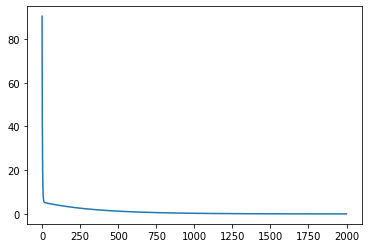

In [11]:
# Función Linear recibe como parámetros las dimensiones de la entrada y salida.
model = nn.Linear(1, 1)

loss_function = nn.MSELoss()

optimizer = optim.SGD(model.parameters(), lr=0.015)

# Crear training loop
losses = []
iterations = 2000

for i in range(iterations):
  prediction = model(prices)
  loss = loss_function(prediction, units)
  losses.append(loss.data)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

print(float(loss))
plt.plot(range(iterations), losses)

In [12]:
# El modelo ya se encuentra entrenado.

# Predecir valor.
x = torch.Tensor([[4.0]])
p = model(x)
p

tensor([[8.7186]], grad_fn=<AddmmBackward>)

# Regresión Logística

---



In [14]:
n = 100
# Se usa // para retornar entero.
h = n//2
dimen = 2

data = np.random.randn(n, dimen) * 3
data

array([[-0.57312696,  2.59857884],
       [-0.90834402, -2.06967319],
       [ 1.47770646,  2.96712762],
       [ 2.11033668, -0.75066393],
       [ 3.26692825,  1.8290898 ],
       [-3.04014961, -1.20192558],
       [-2.71089451, -4.06540311],
       [-0.62667192,  1.72322867],
       [-2.06131191,  1.91022809],
       [-0.99399801,  8.08853817],
       [-1.67945651, -2.28641544],
       [-1.48438348, -1.73079661],
       [ 2.30615357,  0.65636072],
       [-0.89863909,  4.29050695],
       [ 0.83123168, -0.60769091],
       [-1.29886793,  5.99331017],
       [-1.49874124,  3.76583913],
       [-3.10188868,  1.47234831],
       [-1.16874997,  2.70868104],
       [-2.23599536,  9.18605793],
       [-1.06736274,  1.11904033],
       [ 2.08432749,  1.29332223],
       [-0.39008632, -2.11992239],
       [-3.68885133, -0.22343334],
       [-2.69219529, -0.58069552],
       [ 2.21897638, -4.33459748],
       [ 0.02312976,  0.85682271],
       [ 4.95475322,  0.97746688],
       [ 1.64524013,

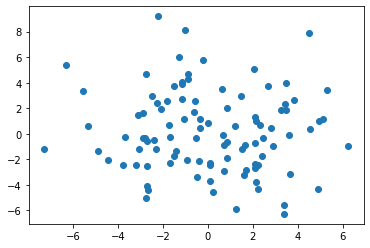

In [15]:
# Preparar los datos.
plt.scatter(data[:, 0], data[:, 1])

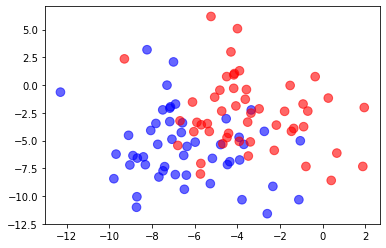

In [18]:
# Punto arbitrario.
# Se centrar los datos del gráfico.
data[:h, :]= data[:h, :] - 3 * np.ones((h, dimen))

data[h:, :]= data[:h, :] + 3 * np.ones((h, dimen))

colors = ['blue', 'red']
# Colores en toda la longitud del arreglo.
color = np.array([colors[0]] * h + [colors[1]] * h).reshape(n)
plt.scatter(data[:, 0], data[:, 1], c=color, s=75, alpha=0.6)

In [22]:
target = np.array([0] * h + [1] * h).reshape(n, 1)

# Crear tensores para variables de entrada y salida.
x = torch.from_numpy(data).float().requires_grad_(True)

y = torch.from_numpy(target).float()

x.shape, y.shape

(torch.Size([100, 2]), torch.Size([100, 1]))

tensor(0.4255, grad_fn=<BinaryCrossEntropyBackward>)

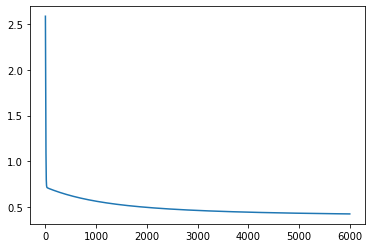

In [29]:
# Se coloca 2 en nn.Lineal porque el shape de X tiene 2.
model = nn.Sequential(
          nn.Linear(2, 1),
          nn.Sigmoid()
        )
loss_function = nn.BCELoss()

optimizer = optim.SGD(model.parameters(), lr=0.01)

losses = []

iterations = 6000

for i in range(iterations):
  result = model(x)

  loss = loss_function(result, y)
  losses.append(loss.data)

  optimizer.zero_grad()
  loss.backward()

  optimizer.step()

plt.plot(range(iterations), losses)
loss

In [32]:
blue = torch.Tensor([[-5, -6]])
prediction = model(blue).data[0][0] > 0.5
# Resultado es una probabilidad de que sea un punto azul.
print(colors[prediction])

red = torch.Tensor([[8, 6]])
prediction = model(red).data[0][0] > 0.5
# Resultado es una probabilidad de que sea un punto rojo.
print(colors[prediction])

blue
red


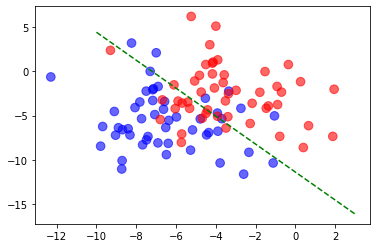

In [38]:
# Pesas asignados.
w = list(model.parameters())
# Se asignan a las variables.
w0 = w[0].data.numpy()
w1 = w[1].data.numpy()

# Graficar con una línea que separa la clasificación en las dos categorías.
plt.scatter(data[:,0], data[:,1], c=color, s=75, alpha=0.6)

# En el eje X. Distribuir números entre los dos parámetros de entrada.
# Donde n: es la cantidad de elementos.
x_axis = np.linspace(-10, 3, n)
# En el eje Y. 
y_axis = -(w1[0] + x_axis*w0[0][0]) / w0[0][1]
# Línea verde con separadores.
plt.plot(x_axis, y_axis, 'g--')